- Bias: Difference between the prediction of the true model and the average models
- True model: Models builds on a population data
- Average model: Average of all the prediction results obtained from the various sample obtained from the population model
- Variance: DIfference between the prediction of all the models obtained from the sample of average model

|Model|Bias|Variance|
|-----|----|--------|
|Linear regression|high bias|less variance|
|Decision tree|low |high lesser than LR|

- bias of x = Prediction of population model - Prediction of mean_model
- bias of the model = Mean(abs(Prediction of population model - Prediction of mean model))

- Bias maybe caused due to lack of sufficient features and related datasets used for training the models
- The model may fail to capture essential regularities present in the dataset. As a result, the resulting Machine Learning models would end up reflecting the bias

## Underfitting
*To simple to explain the pattern/variance*
- ML model bias can be understood in terms of some of the following:
    - Lack of an appropriate set of features may resilt in bias
    - In such a condition underfitting may occur
    - High bias and low variance

Banking: Imagine a scenario when a valid application loan request is not approved<br>
This could as well happen as a result of bias in the system introduced to the features and related data used for model training such as gender, education, race, location etc.

## Overfitting
*Too good to be true*
- When a model is able to fit almost perfectly your training data but is performing poorly on new data
- It learns the very specific pattern seen in the training data

## Regularization
- If model has too few featurees or oversimplifies reality, the algortihm is going to undefit and probably not perform well
- If model has too many features or features with multicollinearity you algorithm will overfit and not generalize well

R-Square = 1 - sum(Yact - Ypred)^2

## Ridge regression
- If model overfitted it adds bias to the model
- Starting with a worse fit, it gives more accuracy in the long term

Least Square
Size = y-axis intercept + slop * Weight
Ridge
Size = y-axis intercept + slop * Weight
Sum of residual squares + lambda * slope^2

y = 0.4 + 1.3*x
MSR = 0 overfitted + Lambda * (1.3*1.3)
Penalty = 1.69
y = 0.9 + 0.8*x
MSR = 0.3*0.3 + 0.1*0.1
lambda = 1

Lasso<br>
The sum of the squared residuals + lambda * |slope|

---

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.special import boxcox,boxcox1p, inv_boxcox
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('Boston.csv')

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [53]:
x = df.iloc[:,0:13]
y = df.iloc[:,13]

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [55]:
model_full = LinearRegression()

In [56]:
y_test.shape

(102,)

In [58]:
mse,bias,var = bias_variance_decomp(model_full,x_train.values,y_train.values,x_test.values,y_test.values,loss = 'mse',num_rounds=200,random_seed=100)

In [64]:
print(mse)
print(bias)
print(var)

24.88904482606189
23.722773821407955
1.1662710046539206


In [59]:
model_full = model_full.fit(x_train,y_train)

In [60]:
pred = model_full.predict(x_test)

In [61]:
r2_score(y_test,pred)

0.7555033086871299

In [81]:
model_ridge = Ridge(alpha = 1.0)

mse, bias, var = bias_variance_decomp(model_ridge,x_train.values,x_test.values,y_train.values,y_test.values,loss='mse',num_rounds=200,random_seed=100)

## Ridge

In [82]:
model_ridge = model_ridge.fit(x_train,y_train)

In [83]:
pred_r = model_ridge.predict(x_test)

In [84]:
r2_score(y_test,pred_r)

0.7500978146031213

In [88]:
df_coef = pd.DataFrame({'coef':model_ridge.coef_,'columns':x_train.columns})

In [89]:
df_coef.head()

,coef,columns
0,-0.077191,crim
1,0.049234,zn
2,-0.033538,indus
3,2.897073,chas
4,-8.907673,nox


<AxesSubplot:xlabel='columns', ylabel='coef'>

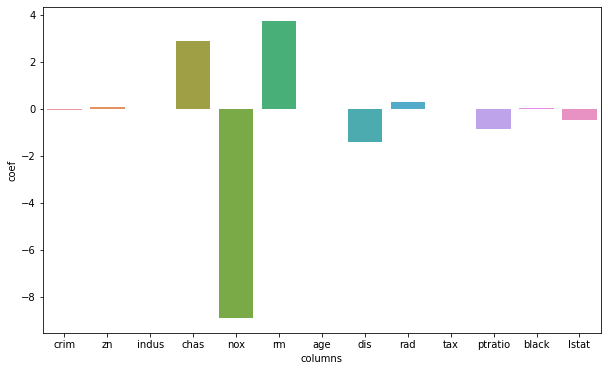

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'columns',y = 'coef',data = df_coef)

In [93]:
df_ridge_coef = pd.DataFrame({"coef":model_ridge.coef_,'columns':x_train.columns})

<AxesSubplot:xlabel='columns', ylabel='coef'>

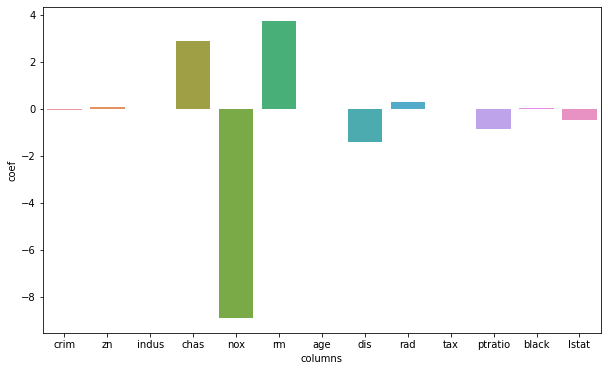

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'columns',y = 'coef',data = df_ridge_coef)

## Lasso Regression

In [95]:
model_lasso = Lasso(1.0)

In [97]:
mse,bias,var = bias_variance_decomp(model_lasso,x_train.values,y_train.values,x_test.values,y_test.values,loss = 'mse',num_rounds=200,random_seed=100)

In [98]:
print('mse: ',mse,'\nbias: ',bias,'\nvariance: ',var)

mse:  32.30287544745072 
bias:  31.372428672342313 
variance:  0.9304467751084223


In [99]:
model_lasso = model_lasso.fit(x_train,y_train)

In [100]:
pred_lasso = model_lasso.predict(x_test)

In [101]:
r2_score(y_test,pred_lasso)

0.6776294232065305

In [103]:
df_lasso_coef = pd.DataFrame({"coef": model_lasso.coef_,"columns":x_train.columns})

In [104]:
df_lasso_coef.head()

,coef,columns
0,-0.032581,crim
1,0.053265,zn
2,-0.000000,indus
3,0.000000,chas
4,-0.000000,nox


In [107]:
np.where(df_lasso_coef.coef == 0)

(array([2, 3, 4]),)

<AxesSubplot:xlabel='columns', ylabel='coef'>

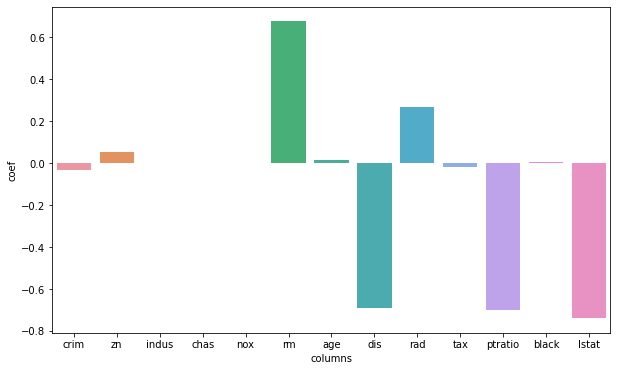

In [106]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'columns',y = 'coef',data = df_lasso_coef)

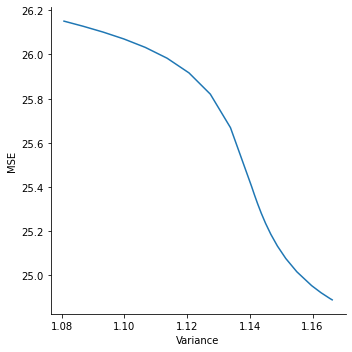

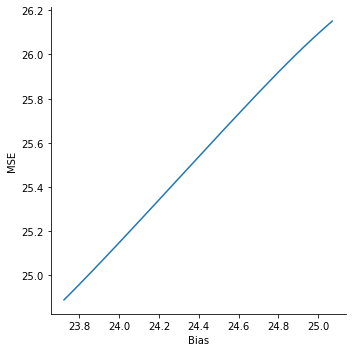

In [108]:
alpha = [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]
biases = []
mses = []
variances = []
for i in alpha:
    model = Ridge(alpha = i)
    mse,bias,var = bias_variance_decomp(model,x_train.values,y_train.values,x_test.values,y_test.values,loss = 'mse',num_rounds=200,random_seed=100)
    mses.append(mse)
    biases.append(bias)
    variances.append(var)
plt1 = sns.relplot(x=variances,y=mses,kind = 'line')
plt2 = sns.relplot(x = biases,y = mses,kind = 'line')
plt1.set_xlabels('Variance')
plt1.set_ylabels('MSE')
plt2.set_xlabels('Bias')
plt2.set_ylabels('MSE')